In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
stopwords = nltk.corpus.stopwords.words('english')
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
train_data = pd.read_csv('dataset (1).csv',)
train_data

Unnamed: 0                                            Tweets   \
0            NaN  is having safest transportation in trains by r...   
1            NaN  this is haing software industries where many w...   
2            NaN  they the women are having good respect in soci...   
3            NaN  we women are having a joyful atmosphere at the...   
4            NaN  this is promoting many rules about consciousne...   
...          ...                                                ...   
1493         NaN  Women get pure respect from society that she c...   
1494         NaN            Women have a bad part in life right now   
1495         NaN  Women have a peaceful and safe environment for...   
1496         NaN   Women have no protection when she goes out alone   
1497         NaN  Women have protection and security in the publ...   

      Sentiment     City  
0             1   mumbai  
1             1  Kolkata  
2             1  chennai  
3             1   mumbai  
4             1  kolkata  
...         ...      ...  
1493          1  Chennai  
1494          2     Pune  
1495          1  Kolkata  
1496          2    Delhi  
1497          1   Mumbai  

[1498 rows x 4 columns]

In [3]:
train_data.drop(['Unnamed: 0'],inplace = True,axis = 1)

In [4]:
train_data.head()

Tweets   Sentiment     City
0  is having safest transportation in trains by r...          1   mumbai
1  this is haing software industries where many w...          1  Kolkata
2  they the women are having good respect in soci...          1  chennai
3  we women are having a joyful atmosphere at the...          1   mumbai
4  this is promoting many rules about consciousne...          1  kolkata

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweets     1498 non-null   object
 1   Sentiment  1498 non-null   int64 
 2   City       1498 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.2+ KB


In [6]:
print("Number of data points in train data", train_data.shape)
print('-'*70)
print("The attributes of data :", train_data.columns.values)

Number of data points in train data (1498, 3)
----------------------------------------------------------------------
The attributes of data : ['Tweets ' 'Sentiment' 'City']


#### Check Null Values


In [7]:
train_data.isna().any()

Tweets       False
Sentiment    False
City         False
dtype: bool

#### Check Duplicate Values

In [8]:
train_data.duplicated().any()

True

Duplicate Values are found. We can handled further 

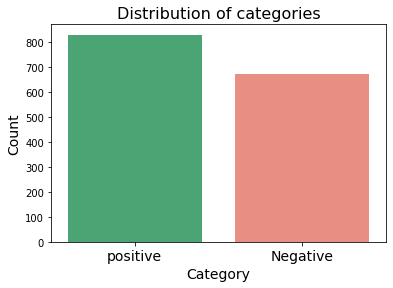

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
f, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (6,4))
sns.countplot(train_data.Sentiment, palette = ['mediumseagreen','salmon'],ax = ax)
ax.set_title("Distribution of categories", fontsize = 16)
ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_xticklabels(labels = ['positive','Negative'],fontsize = 14)
ax.set_xlabel(xlabel='Category', fontsize=14)
plt.show()

### Text Feature Preprocessing

### Tokenization

In [10]:
train_data['Tweets '] = train_data['Tweets '].str.split()

### Lower Case Text

In [11]:
train_data['Tweets '] = train_data.apply(lambda row: [token.lower() for token in row['Tweets ']], axis=1)

In [12]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [13]:
import re
train_data['Tweets '] = train_data.apply(lambda row: [remove_html(token) for token in row['Tweets ']] , 
                                          axis=1)
train_data['Tweets '].head()

0    [is, having, safest, transportation, in, train...
1    [this, is, haing, software, industries, where,...
2    [they, the, women, are, having, good, respect,...
3    [we, women, are, having, a, joyful, atmosphere...
4    [this, is, promoting, many, rules, about, cons...
Name: Tweets , dtype: object

### Remove Non-Alphanumerics from Text

In [14]:
train_data['Tweets '] = train_data.apply(lambda row: [re.sub(r'\W+', '', token) for token in row['Tweets ']], axis=1)

### Store Stopwords

In [15]:
train_data['stopwords'] = train_data.apply(lambda row: [token for token in row['Tweets '] if token in stopwords], axis=1)

### Remove Stopwords

In [16]:
train_data['clean_text'] = train_data.apply(lambda row: [token for token in row['Tweets '] if token not in stopwords], axis=1)

### Stem Cleaned Text

In [17]:
porter = PorterStemmer()
train_data['stemmed_text'] = train_data.apply(lambda row: [porter.stem(token) for token in row['clean_text']] , axis=1)

### Lemmatize Cleaned Text

In [18]:
wnl = WordNetLemmatizer()
train_data['lemmatized_text'] = train_data.apply(lambda row: [wnl.lemmatize(token) for token in row['clean_text']] , axis=1)

### Tokens to String

In [19]:
train_data['Tweets '] = train_data['Tweets '].apply(lambda row: " ".join(row))
train_data['clean_text'] = train_data['clean_text'].apply(lambda row: " ".join(row))
train_data['stopwords'] = train_data['stopwords'].apply(lambda row: " ".join(row))
train_data['stemmed_text'] = train_data['stemmed_text'].apply(lambda row: " ".join(row))
train_data['lemmatized_text'] = train_data['lemmatized_text'].apply(lambda row: " ".join(row))

In [20]:
train_data

Tweets   Sentiment     City  \
0     is having safest transportation in trains by r...          1   mumbai   
1     this is haing software industries where many w...          1  Kolkata   
2     they the women are having good respect in soci...          1  chennai   
3     we women are having a joyful atmosphere at the...          1   mumbai   
4     this is promoting many rules about consciousne...          1  kolkata   
...                                                 ...        ...      ...   
1493  women get pure respect from society that she c...          1  Chennai   
1494            women have a bad part in life right now          2     Pune   
1495  women have a peaceful and safe environment for...          1  Kolkata   
1496   women have no protection when she goes out alone          2    Delhi   
1497  women have protection and security in the publ...          1   Mumbai   

                      stopwords  \
0            is having in by at   
1        this is where where at   
2     they the are having in of   
3      we are having a at their   
4              this is about of   
...                         ...   
1493          from that she not   
1494              have a in now   
1495         have a and for and   
1496       have no when she out   
1497            have and in the   

                                             clean_text  \
0     safest transportation trains rpoviding women s...   
1     haing software industries many woman many woma...   
2              women good respect society work culuture   
3                    women joyful atmosphere work place   
4              promoting many rules consciousness woman   
...                                                 ...   
1493  women get pure respect society could get anywh...   
1494                          women bad part life right   
1495   women peaceful safe environment social life work   
1496                        women protection goes alone   
1497             women protection security public space   

                                           stemmed_text  \
0     safest transport train rpovid women safeti tra...   
1     ha softwar industri mani woman mani woman feel...   
2               women good respect societi work culutur   
3                        women joy atmospher work place   
4                      promot mani rule conscious woman   
...                                                 ...   
1493  women get pure respect societi could get anywh...   
1494                          women bad part life right   
1495           women peac safe environ social life work   
1496                             women protect goe alon   
1497                   women protect secur public space   

                                        lemmatized_text  
0     safest transportation train rpoviding woman sa...  
1     haing software industry many woman many woman ...  
2              woman good respect society work culuture  
3                    woman joyful atmosphere work place  
4               promoting many rule consciousness woman  
...                                                 ...  
1493  woman get pure respect society could get anywh...  
1494                          woman bad part life right  
1495   woman peaceful safe environment social life work  
1496                          woman protection go alone  
1497             woman protection security public space  

[1498 rows x 7 columns]

# Text Feature Analysis

### Univariate Analysis: Word count for Tweet Text (Without Stopword Removal)

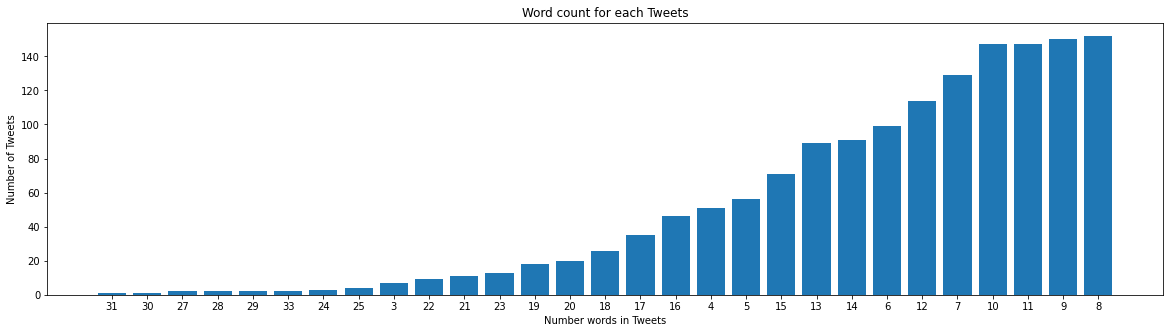

In [21]:
word_count = train_data['Tweets '].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of Tweets')
plt.xlabel('Number words in Tweets')
plt.title('Word count for each Tweets')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**SUMMARY:Most of the Tweets contain upto 20 words.**

### Bivariate Analysis

### Classwise Distribution

### Tweet Text Distribution

#### PDF

In [22]:
Positive_Sentiment = train_data[train_data['Sentiment']==1]['Tweets '].str.split().apply(len)
Positive_word_count = Positive_Sentiment.values

Negative_Sentiment = train_data[train_data['Sentiment']==2]['Tweets '].str.split().apply(len)
Negative_word_count =Negative_Sentiment.values

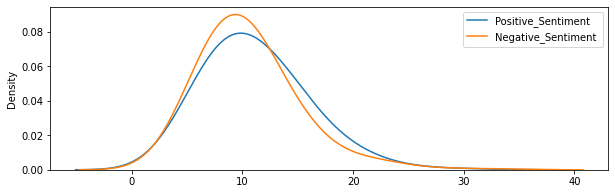

In [23]:
plt.figure(figsize=(10,3))
sns.kdeplot(Positive_word_count,label="Positive_Sentiment", bw=0.6)
sns.kdeplot(Negative_word_count,label="Negative_Sentiment ", bw=0.6)
plt.legend()
plt.show()

Summary_data :  

### Clean Text Distribution Without (Stopwords)

#### PDF

In [24]:
Positive_Sentiment = train_data[train_data['Sentiment']==1]['stemmed_text'].str.split().apply(len)
Positive_word_count = Positive_Sentiment.values

Negative_Sentiment = train_data[train_data['Sentiment']==2]['stemmed_text'].str.split().apply(len)
Negative_word_count =Negative_Sentiment.values

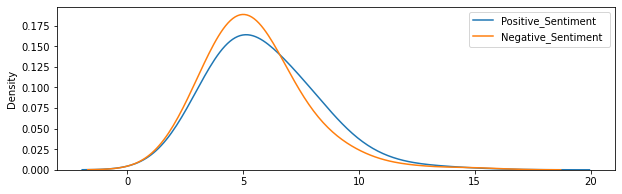

In [25]:
plt.figure(figsize=(10,3))
sns.kdeplot(Positive_word_count,label="Positive_Sentiment", bw=0.6)
sns.kdeplot(Negative_word_count,label="Negative_Sentiment ", bw=0.6)
plt.legend()
plt.show()

### Word Cloud Clean Data

### Negative_Sentiment 

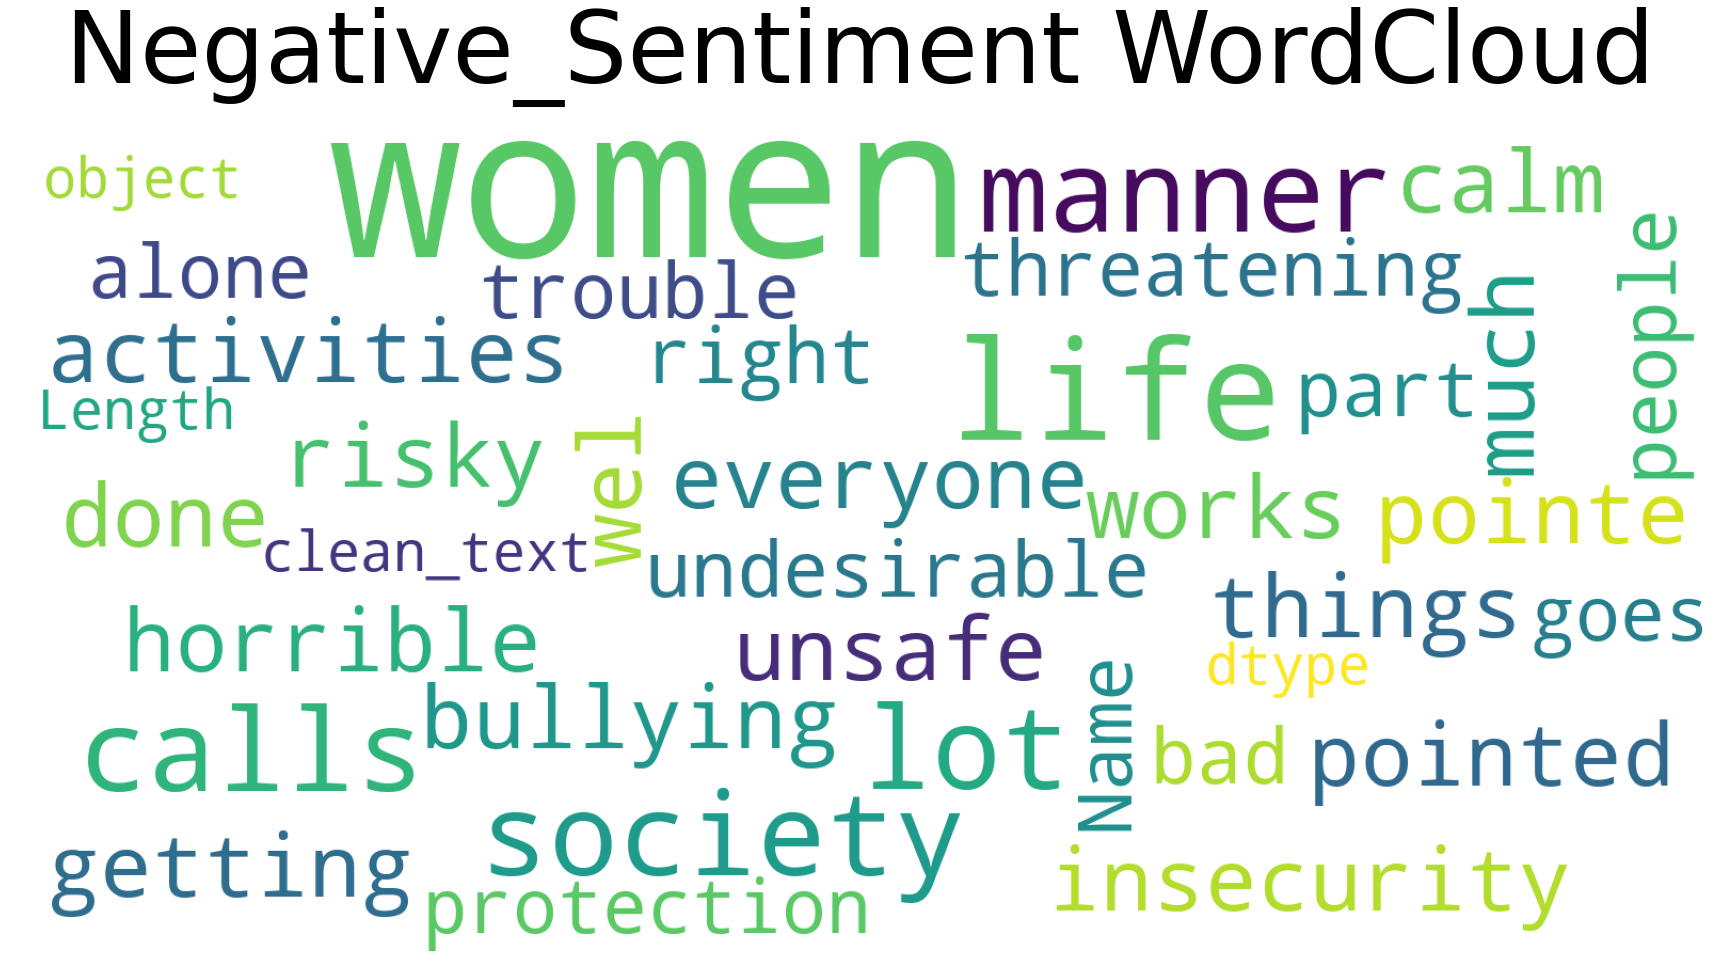

In [26]:
Negative_Sentiment = train_data[train_data['Sentiment']==2]['clean_text'].apply(lambda row: row.split(" "))
wordcloud = WordCloud(background_color='white',
                    max_words = 500,
                    max_font_size = 200, 
                    random_state = 42,
                    width=1600, 
                    height=800)
wordcloud.generate(str(Negative_Sentiment))
plt.figure(figsize=(24.0,16.0))

plt.imshow(wordcloud);
plt.title("Negative_Sentiment WordCloud", fontdict={'size': 100, 'color': 'black', 
                          'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

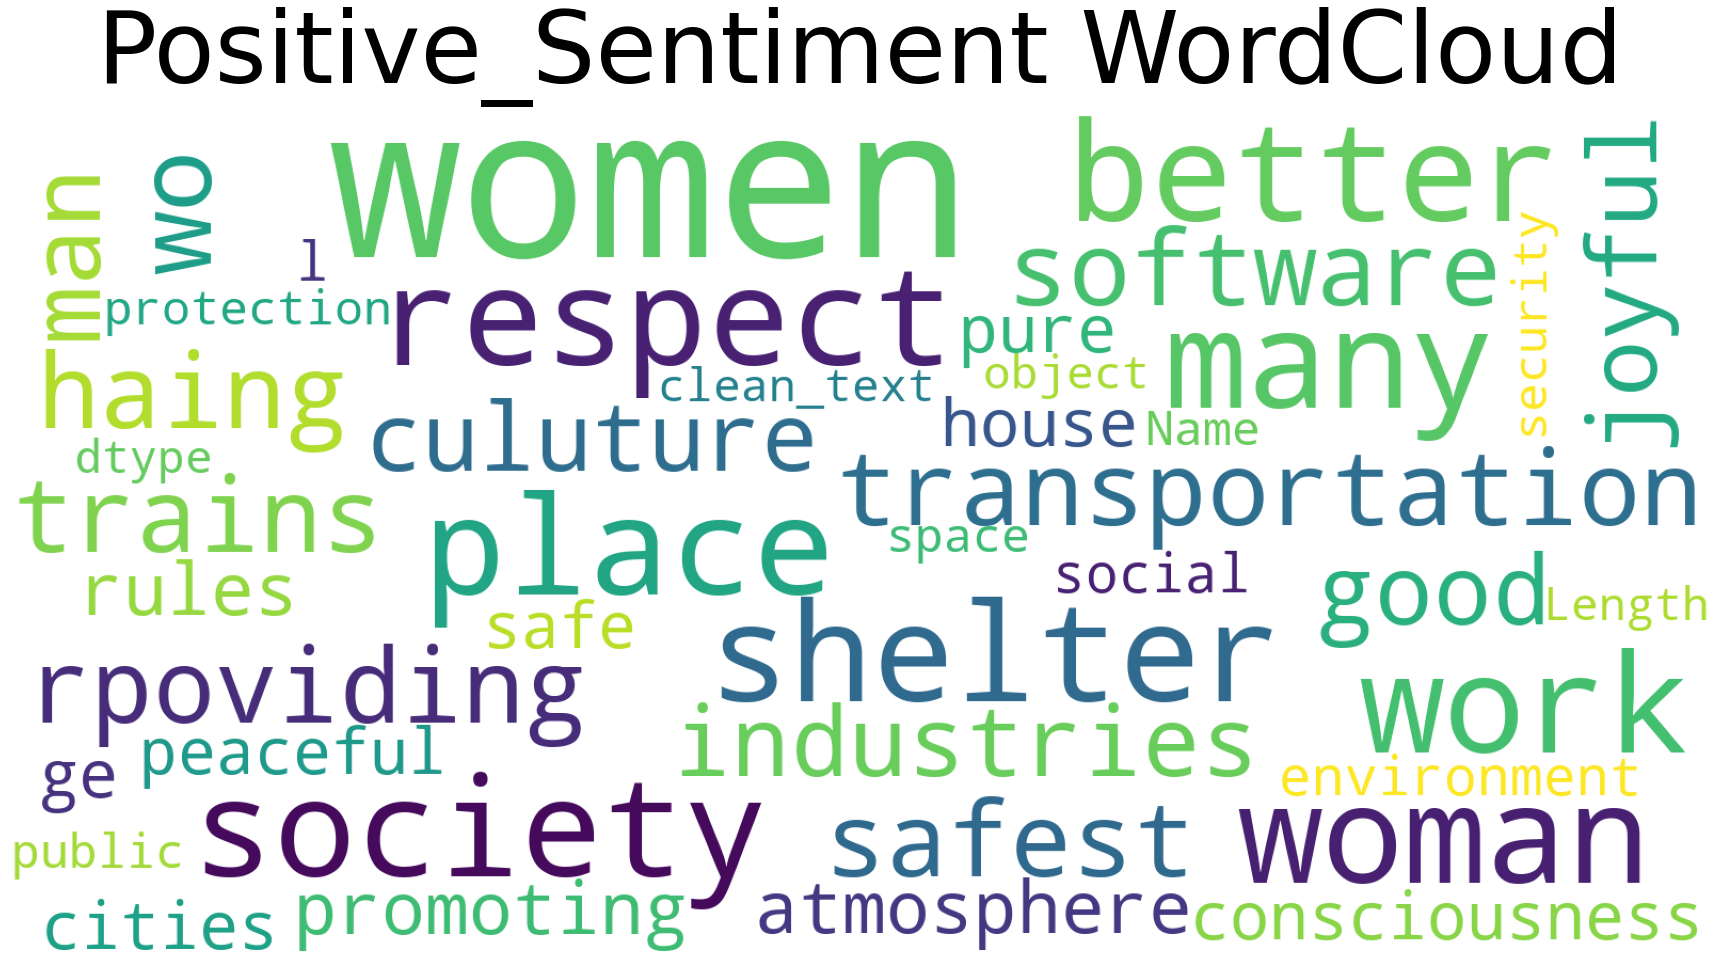

In [27]:
Positive_Sentiment = train_data[train_data['Sentiment']==1]['clean_text'].apply(lambda row: row.split(" "))
wordcloud = WordCloud(background_color='white',
                    max_words = 500,
                    max_font_size = 200, 
                    random_state = 42,
                    width=1600, 
                    height=800)
wordcloud.generate(str(Positive_Sentiment))
plt.figure(figsize=(24.0,16.0))

plt.imshow(wordcloud);
plt.title("Positive_Sentiment WordCloud", fontdict={'size': 100, 'color': 'black', 
                          'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

### Word Frequency Distribution (Clean Data)

In [28]:
freq_dict = Counter()
for sent in Negative_Sentiment:
    for word in sent:
        freq_dict[word] += 1

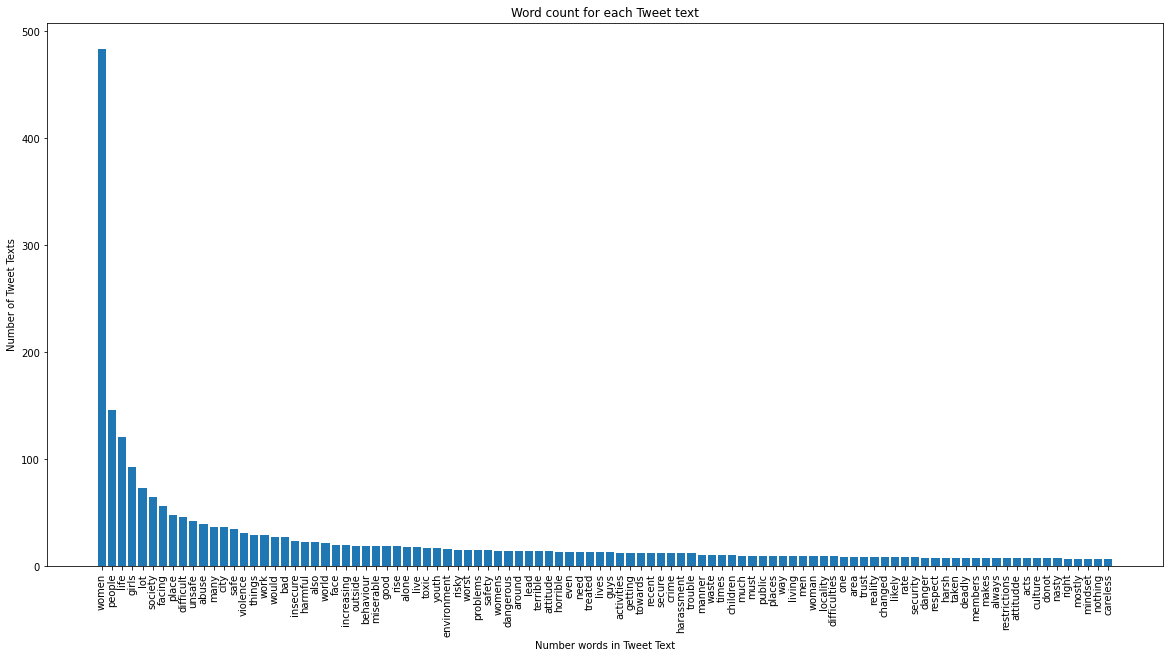

In [29]:
word_dict = dict(sorted(dict(freq_dict.most_common(100)).items(), key=lambda kv: kv[1], reverse=True))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of Tweet Texts')
plt.xlabel('Number words in Tweet Text')
plt.title('Word count for each Tweet text')
plt.xticks(ind, list(word_dict.keys()), rotation='vertical')
plt.show()

In [30]:
freq_dict = Counter()
for sent in Positive_Sentiment:
    for word in sent:
        freq_dict[word] += 1

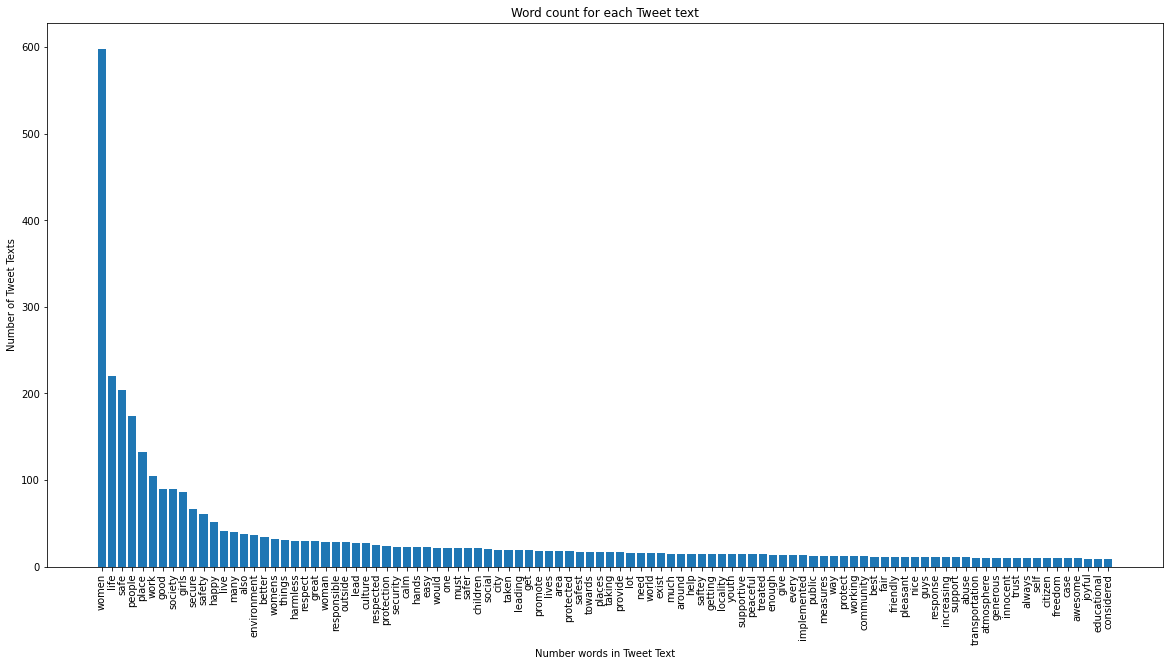

In [31]:
word_dict = dict(sorted(dict(freq_dict.most_common(100)).items(), key=lambda kv: kv[1], reverse=True))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of Tweet Texts')
plt.xlabel('Number words in Tweet Text')
plt.title('Word count for each Tweet text')
plt.xticks(ind, list(word_dict.keys()), rotation='vertical')
plt.show()

### Observations:

- Some of the top words are common across both the classes like 'women', 'life', 'safe','society','facing','place' etc
- The other top words in positive sentiment  are 'women', 'life','safe', etc. This means the positive sentiment  would be like "Womens are having joyful atmosphere at their work place ?"
- The other top words in Negative Sentiment  are 'Women', 'People', 'life', 'girl', 'Society' etc. This means the Negaive Sentiment would be mostly the society women is living right now it is the worst.


### Boxplot Distribution

### Tweet Text (With Stopwords)

In [32]:
train_data['num_words_text'] = train_data['Tweets '].str.split().apply(len)
train_data['num_chars_text'] = train_data['Tweets '].apply(lambda row: len(str(row)))

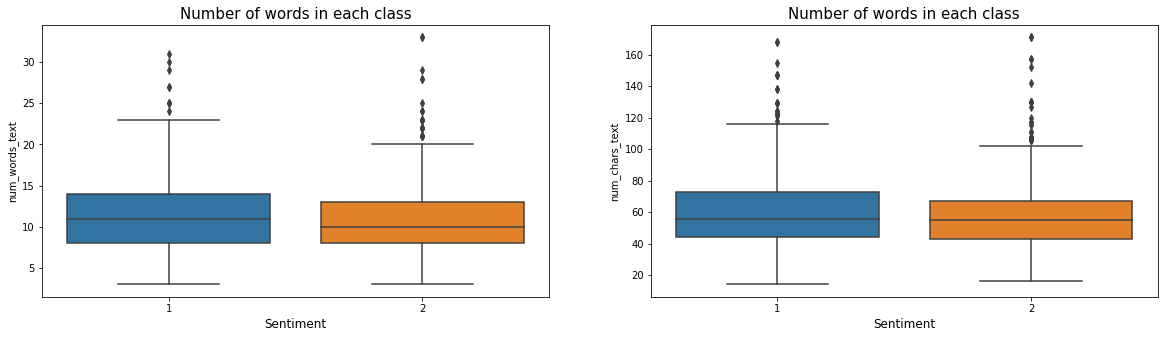

In [33]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x='Sentiment', y='num_words_text', data=train_data, ax=axes[0])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)
sns.boxplot(x='Sentiment', y='num_chars_text', data=train_data, ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_title("Number of words in each class", fontsize=15)
plt.show()

clean text

In [34]:
train_data['num_words_clean'] = train_data['clean_text'].str.split().apply(len)
train_data['num_chars_clean'] = train_data['clean_text'].apply(lambda row: len(str(row)))

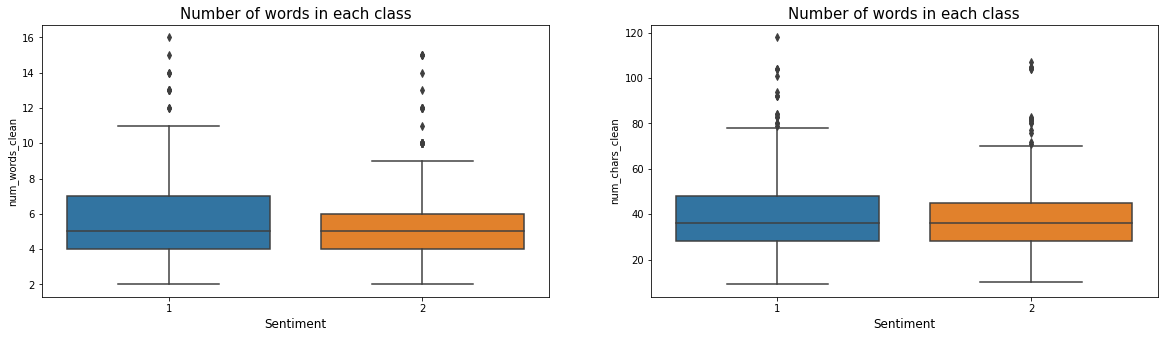

In [35]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x='Sentiment', y='num_words_clean', data=train_data, ax=axes[0])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)
sns.boxplot(x='Sentiment', y='num_chars_clean', data=train_data, ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_title("Number of words in each class", fontsize=15)
plt.show()

In [36]:
from textblob import TextBlob
train_data['polarity'] = train_data['Tweets '].apply(lambda x: TextBlob(x).sentiment.polarity)

In [37]:
train_data['Tweet_len'] = train_data['Tweets '].apply(lambda x: len(x))

In [38]:
train_data['word_count'] = train_data['Tweets '].apply(lambda x: len(x.split()))

In [39]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) 

In [40]:
train_data['avg_word_len'] = train_data['Tweets '].apply(lambda x: get_avg_word_len(x))

In [41]:
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import iplot
pyo.init_notebook_mode()
cf.go_offline()
train_data['polarity'].iplot(kind = 'hist',color = 'blue',bins = 50,xTitle = 'Polarity',yTitle = 'Count',title = 'Sentiment Polarity Distribution')


In [42]:
train_data['Tweet_len'].iplot(kind = 'hist',xTitle = 'Review_Len',yTitle = 'Count',title = 'Review Text length',colors='green')
#most of the question len are 100 to 200 characters

In [43]:
train_data['word_count'].iplot(kind = 'hist',xTitle = 'Word Count',yTitle = 'Count',title = 'Word Count Distribution')

In [44]:
train_data['avg_word_len'].iplot(kind = 'hist',xTitle = 'avg_word_len',yTitle = 'Count',title = 'avg_word_len Distribution')

In [45]:
def get_top_n_word(x,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words  = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1],reverse = True)
    return words_freq[:n]

In [46]:
words = get_top_n_word(train_data['Tweets '],20)

In [47]:
words

[('women are', 257),
 ('for women', 189),
 ('in the', 137),
 ('it is', 86),
 ('lot of', 84),
 ('women is', 82),
 ('people are', 81),
 ('for girls', 77),
 ('to women', 75),
 ('of women', 75),
 ('she is', 73),
 ('the society', 72),
 ('people in', 67),
 ('in this', 66),
 ('to be', 61),
 ('when she', 57),
 ('are not', 54),
 ('and women', 54),
 ('women in', 53),
 ('are facing', 52)]

In [48]:
train1 = pd.DataFrame(words,columns = ['Bigram', 'Frequency'])
train1 = train1.set_index('Bigram')
train1.iplot(kind = 'bar',xTitle = 'Bigram',yTitle = 'Count',title ='Top 20 Bigram Words')

In [49]:
def get_top_n_word(x,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words  = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1],reverse = True)
    return words_freq[:n]

In [50]:
words = get_top_n_word(train_data['Tweets '],20)

In [51]:
words

[('in the society', 65),
 ('when she is', 46),
 ('people in the', 46),
 ('facing lot of', 36),
 ('women are facing', 34),
 ('are facing lot', 34),
 ('and women are', 34),
 ('for women to', 23),
 ('are so many', 20),
 ('and girls are', 20),
 ('women when she', 19),
 ('she is outside', 18),
 ('for girls and', 18),
 ('for women and', 18),
 ('people in society', 18),
 ('place for women', 17),
 ('there are so', 17),
 ('life for women', 17),
 ('women are in', 17),
 ('in this area', 17)]

In [52]:
train1 = pd.DataFrame(words,columns = ['Trigram', 'Frequency'])
train1 = train1.set_index('Trigram')
train1.iplot(kind = 'bar',xTitle = 'Trigram',yTitle = 'Count',title ='Top 20 Trigram Words')

In [53]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [55]:
blob = TextBlob(str(train_data['Tweets ']))

In [56]:
pos_df = pd.DataFrame(blob.tags,columns = ['words','pos'])
pos_df = pos_df['pos'].value_counts()
pos_df

NN     20
NNS    11
CD     11
IN     11
DT      9
VBP     7
JJ      7
VBG     5
PRP     4
RB      4
VBZ     4
CC      2
WRB     2
VBD     1
NNP     1
JJS     1
Name: pos, dtype: int64

In [57]:
pos_df.iplot(kind = 'bar')  

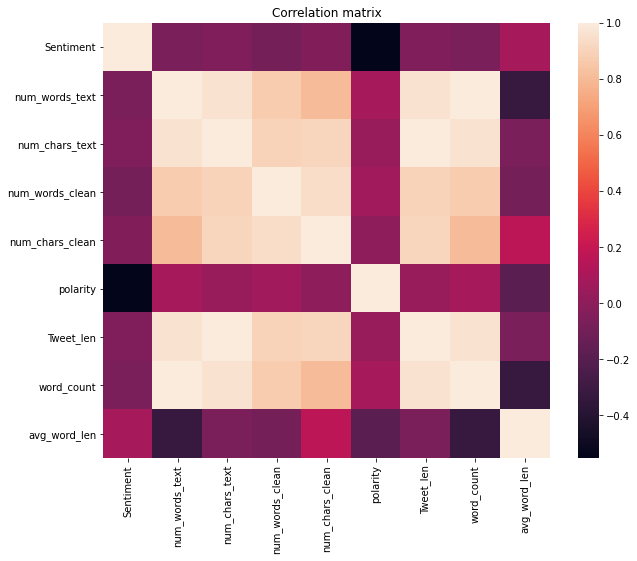

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, ax=ax)
plt.title("Correlation matrix")
plt.show()

In [59]:
train_data.head()

Tweets   Sentiment     City  \
0  is having safest transportation in trains by r...          1   mumbai   
1  this is haing software industries where many w...          1  Kolkata   
2  they the women are having good respect in soci...          1  chennai   
3  we women are having a joyful atmosphere at the...          1   mumbai   
4  this is promoting many rules about consciousne...          1  kolkata   

                   stopwords  \
0         is having in by at   
1     this is where where at   
2  they the are having in of   
3   we are having a at their   
4           this is about of   

                                          clean_text  \
0  safest transportation trains rpoviding women s...   
1  haing software industries many woman many woma...   
2           women good respect society work culuture   
3                 women joyful atmosphere work place   
4           promoting many rules consciousness woman   

                                        stemmed_text  \
0  safest transport train rpovid women safeti tra...   
1  ha softwar industri mani woman mani woman feel...   
2            women good respect societi work culutur   
3                     women joy atmospher work place   
4                   promot mani rule conscious woman   

                                     lemmatized_text  num_words_text  \
0  safest transportation train rpoviding woman sa...              12   
1  haing software industry many woman many woman ...              17   
2           woman good respect society work culuture              12   
3                 woman joyful atmosphere work place              11   
4            promoting many rule consciousness woman               9   

   num_chars_text  num_words_clean  num_chars_clean  polarity  Tweet_len  \
0              85                7               66  0.000000         85   
1             107               12               84  0.466667        107   
2              66                6               40  0.700000         66   
3              59                5               34  0.000000         59   
4              57                5               40  0.500000         57   

   word_count  avg_word_len  
0          12      6.166667  
1          17      5.352941  
2          12      4.583333  
3          11      4.454545  
4           9      5.444444

In [60]:
corpus = train_data['lemmatized_text']

In [61]:
corpus

0       safest transportation train rpoviding woman sa...
1       haing software industry many woman many woman ...
2                woman good respect society work culuture
3                      woman joyful atmosphere work place
4                 promoting many rule consciousness woman
                              ...                        
1493    woman get pure respect society could get anywh...
1494                            woman bad part life right
1495     woman peaceful safe environment social life work
1496                            woman protection go alone
1497               woman protection security public space
Name: lemmatized_text, Length: 1498, dtype: object

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 80, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [63]:
X.shape

(1498, 80)

In [64]:
y = train_data['Sentiment']

In [65]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1493    1
1494    2
1495    1
1496    2
1497    1
Name: Sentiment, Length: 1498, dtype: int64

In [66]:
cv.get_feature_names()[:20]

['abuse',
 'alone',
 'also',
 'area',
 'around',
 'bad',
 'behaviour',
 'better',
 'calm',
 'child',
 'city',
 'crime',
 'culture',
 'difficult',
 'easy',
 'environment',
 'face',
 'facing',
 'facing lot',
 'get']

In [67]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 80,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [69]:
count_df  = pd.DataFrame(X_train,columns = cv.get_feature_names())

In [70]:
count_df.head()

abuse  alone  also  area  around  bad  behaviour  better  calm  child  ...  \
0      0      0     0     0       0    0          0       0     0      0  ...   
1      0      0     0     0       0    0          0       0     0      0  ...   
2      0      0     0     0       0    0          0       0     0      0  ...   
3      0      0     0     1       0    0          0       0     0      0  ...   
4      0      0     0     0       0    0          0       0     0      0  ...   

   woman facing lot  woman life  woman safe  woman society  woman treated  \
0                 0           0           0              0              0   
1                 0           0           0              0              0   
2                 0           0           0              0              0   
3                 0           0           0              0              0   
4                 0           0           0              0              0   

   work  work culture  world  would  youth  
0     0             0      0      0      0  
1     0             0      0      0      0  
2     0             0      0      0      0  
3     0             0      0      0      0  
4     0             0      0      0      0  

[5 rows x 80 columns]

### Ensemble  Techniques

#### Random Forest  Algorithm over (BOW)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

### Hyperparameter tuning 

In [72]:
import numpy 
# Number of trees in Random_Forest
n_estimators = [int(x) for x in np.linspace(start = 200,stop = 2000,num = 10)]

# Number of features to considered in every split
max_features = ['auto','sqrt','log2']

# Maximum number of levels in trees
max_depth = [int(x) for x in np.linspace(10,1000,10)]

#Minimum no of samples required to spllit a node 

min_samples_split = [1,3,4,5,7,9]

# Minimum no of samples required to each leaf node 

min_samples_leaf = [1,2,4,6,8]
#Create a random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100,cv = 3,verbose = 2,
                                random_state = 100,n_jobs = -1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [74]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

In [75]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=1000, max_features='log2', min_samples_split=4,
                       n_estimators=1000)

In [76]:
best_random_grid = rf_randomcv.best_estimator_

In [77]:
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {} ".format(accuracy_score(y_test,y_pred)))
print("Classification report: {} ".format(classification_report(y_test,y_pred)))

[[133  30]
 [ 31 106]]
Accuracy Score 0.7966666666666666 
Classification report:               precision    recall  f1-score   support

           1       0.81      0.82      0.81       163
           2       0.78      0.77      0.78       137

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.80       300
weighted avg       0.80      0.80      0.80       300
 


###  2. Random_Forest  Classifier over Tfidf Vectorizer

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 80, ngram_range = (1,3))
X1 = tf.fit_transform(corpus).toarray()

In [79]:
X1.shape

(1498, 80)

In [80]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y, test_size = 0.2,random_state = 10)

In [81]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1493    1
1494    2
1495    1
1496    2
1497    1
Name: Sentiment, Length: 1498, dtype: int64

In [82]:
cv.get_feature_names()[:20]

['abuse',
 'alone',
 'also',
 'area',
 'around',
 'bad',
 'behaviour',
 'better',
 'calm',
 'child',
 'city',
 'crime',
 'culture',
 'difficult',
 'easy',
 'environment',
 'face',
 'facing',
 'facing lot',
 'get']

In [92]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 80,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [84]:
count_df1  = pd.DataFrame(X_train1,columns = cv.get_feature_names())


In [85]:
count_df1

abuse  alone      also  area  around       bad  behaviour  better  calm  \
0       0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
1       0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
2       0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
3       0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
4       0.0    0.0  0.000000   0.0     0.0  0.850041        0.0     0.0   0.0   
...     ...    ...       ...   ...     ...       ...        ...     ...   ...   
1193    0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
1194    0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
1195    0.0    0.0  0.596707   0.0     0.0  0.000000        0.0     0.0   0.0   
1196    0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   
1197    0.0    0.0  0.000000   0.0     0.0  0.000000        0.0     0.0   0.0   

      child  ...  woman facing lot  woman life  woman safe  woman society  \
0       0.0  ...               0.0    0.000000         0.0            0.0   
1       0.0  ...               0.0    0.851408         0.0            0.0   
2       0.0  ...               0.0    0.000000         0.0            0.0   
3       0.0  ...               0.0    0.000000         0.0            0.0   
4       0.0  ...               0.0    0.000000         0.0            0.0   
...     ...  ...               ...         ...         ...            ...   
1193    0.0  ...               0.0    0.000000         0.0            0.0   
1194    0.0  ...               0.0    0.000000         0.0            0.0   
1195    0.0  ...               0.0    0.000000         0.0            0.0   
1196    0.0  ...               0.0    0.000000         0.0            0.0   
1197    0.0  ...               0.0    0.000000         0.0            0.0   

      woman treated  work  work culture  world  would     youth  
0               0.0   0.0           0.0    0.0    0.0  0.000000  
1               0.0   0.0           0.0    0.0    0.0  0.000000  
2               0.0   0.0           0.0    0.0    0.0  0.000000  
3               0.0   0.0           0.0    0.0    0.0  0.000000  
4               0.0   0.0           0.0    0.0    0.0  0.000000  
...             ...   ...           ...    ...    ...       ...  
1193            0.0   0.0           0.0    0.0    0.0  0.000000  
1194            0.0   0.0           0.0    0.0    0.0  0.000000  
1195            0.0   0.0           0.0    0.0    0.0  0.340638  
1196            0.0   0.0           0.0    0.0    0.0  0.000000  
1197            0.0   0.0           0.0    0.0    0.0  0.000000  

[1198 rows x 80 columns]

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100,cv = 3,verbose = 2,
                                random_state = 100,n_jobs = -1)
rf_randomcv.fit(X_train1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [87]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'entropy'}

In [88]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=890, min_samples_split=4,
                       n_estimators=400)

In [89]:
best_random_grid = rf_randomcv.best_estimator_

In [90]:
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
y_pred1 = best_random_grid.predict(X_test1)
print(confusion_matrix(y_test1,y_pred1))
print("Accuracy Score {} ".format(accuracy_score(y_test1,y_pred1)))
print("Classification report: {} ".format(classification_report(y_test1,y_pred1)))

[[148  17]
 [ 48  87]]
Accuracy Score 0.7833333333333333 
Classification report:               precision    recall  f1-score   support

           1       0.76      0.90      0.82       165
           2       0.84      0.64      0.73       135

    accuracy                           0.78       300
   macro avg       0.80      0.77      0.77       300
weighted avg       0.79      0.78      0.78       300
 


### Conclusion : 
##### In Ensemble Technique (Random Forest Classifier ) the (Bow) give more accuracy than (tfidf) Vectorizer